# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: David Danialy
### Preferred Name (if different): Chosen Name
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

#### https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#### https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from statistics import mean
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)

#### Code the solution

In [4]:
#Read the dataset from the CSV
dataset = pd.read_csv('SVM Data.csv')

#Define the colors for each class
colors = {"Breast": '#4287f5', "Bladder": '#19c5e3', "Colon": '#80d941', "Glioblastoma": '#179933', "Head&Neck": '#f07e78', "Kidney": '#f01e13', "Leukemia": '#f0841f', "LungAdeno": '#db5209', "LungSquamous": '#ce8ced', "Ovarian": '#551075', "Rectal": '#e3d329', "Uterine": '#cc3423'}
class_names = ["Br", "Bl", "C", "G", "H&N", "K", "Le", "LuAd", "LuSq", "O", "R", "U"]
#Separate X and Y from the dataset
X = dataset.drop(['Class', 'id'], axis=1)
Y = dataset['Class']

#### Create a PCA plot

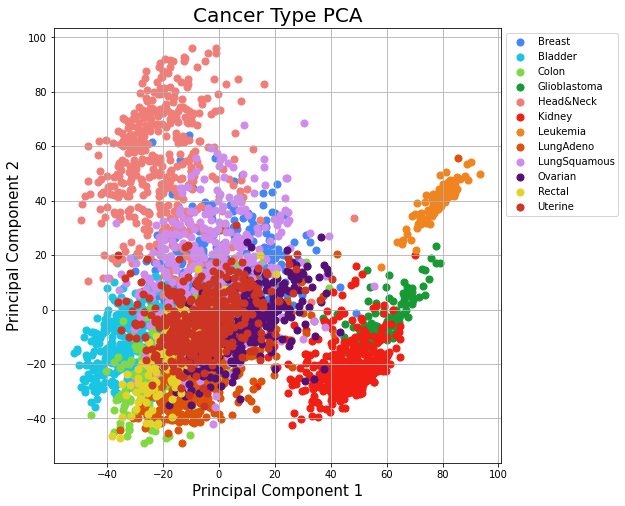

In [5]:
#Perform PCA on the Cancer dataset
pca = PCA(n_components=2)
components = pca.fit_transform(X.to_numpy())

#Convert the 2 principal components into a pandas dataframe with the class labels
df = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
df = pd.concat([df, Y], axis=1)

#Plot the principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Cancer Type PCA', fontsize = 20)
for target in colors:
    indicesToKeep = df['Class'] == target
    ax.scatter(df.loc[indicesToKeep, 'PC1']
               , df.loc[indicesToKeep, 'PC2']
               , c = colors[target]
               , s = 50)
ax.legend(colors, bbox_to_anchor=(1.0, 1.0))
ax.grid()

In [6]:
#Rescale the data
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

#Break up the data into stratified training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)

Y_train

# #Define the model
# model = LinearSVC(multi_class='ovr', class_weight='balanced', C=1.0)

# #Perform 5-fold cross-validation on the model
# res = cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1)

# print('Accuracy scores: ' + str(res))
# print('Mean accuracy: ' + str(mean(res)))

2091    Head&Neck
2821    LungAdeno
627        Breast
3661      Ovarian
2732    LungAdeno
          ...    
2719    LungAdeno
446        Breast
2119    Head&Neck
835        Breast
1819    Head&Neck
Name: Class, Length: 3468, dtype: object

In [ ]:
#Redefine the model to reset training
model = LinearSVC(multi_class='ovr', class_weight='balanced', C=1.0)
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


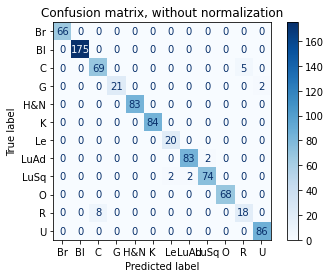

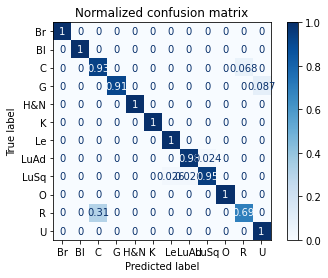

In [ ]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()